# Decision Tree - 회귀형
## 결정트리 회귀 모형은 훈련 데이터 밖의 데이터를 예측 능력 없음

## Load the boston data set and check the features

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
ram_price = pd.read_csv('./ram_price.csv')

In [3]:
ram_price.head()

,num,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [4]:
ram_price = pd.read_csv('./ram_price.csv', index_col='num')
ram_price.head(3)

,date,price
num,,
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0


In [5]:
ram_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    333 non-null    float64
 1   price   333 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


In [6]:
ram_price.describe()

,date,price
count,333.000000,3.330000e+02
mean,1996.878168,1.469755e+06
std,11.026537,2.281991e+07
min,1957.000000,3.700000e-03
25%,1989.670000,1.260000e-01
50%,1996.750000,8.000000e+00
75%,2005.250000,1.330000e+02
max,2015.920000,4.110418e+08


In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

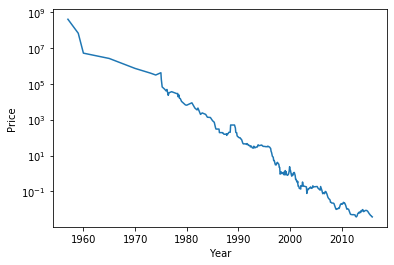

In [8]:
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel('Year')
plt.ylabel('Price')

## Split the data and train the Model

In [9]:
# 2000년 이전을 훈련 데이터로 , 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_price[ram_price['date'] < 2000]
data_test = ram_price[ram_price['date'] >= 2000]

In [10]:
type(data_train)

pandas.core.frame.DataFrame

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    202 non-null    float64
 1   price   202 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 202 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    131 non-null    float64
 1   price   131 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [13]:
# 가격 예측을 위해 날짜 특성만 이용합니다.
data_train.date[:, np.newaxis][:4]

array([[1957.],
       [1959.],
       [1960.],
       [1965.]])

In [14]:
data_train.date[:, np.newaxis].shape

(202, 1)

In [15]:
X_train = data_train.date[:, np.newaxis]  # Series를 Matrix로 변경
X_train.shape

(202, 1)

In [16]:
# 데이터와 타켓 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)
y_train

num
0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)  # 과대적합을 피하기 위해 가지치기 : max_depth=4 

In [18]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [19]:
# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_price.date[:, np.newaxis]
X_all.shape

(333, 1)

In [20]:
y_test = np.log(ram_price.price)
y_test

num
0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
328    -5.403678
329    -5.449140
330    -5.472671
331    -5.572754
332    -5.599422
Name: price, Length: 333, dtype: float64

In [21]:
pred = tree.predict(X_all)
pred[:20]

array([19.83420545, 18.03424922, 15.47238152, 14.78720269, 13.50626839,
       12.89761854, 12.65897144, 12.95249515, 12.1019558 , 11.12112655,
       10.818177  , 10.61408165, 10.79875892, 10.04498711, 10.37349118,
       10.51325312, 10.23995979, 10.29010957,  9.86266556, 10.08580911])

In [22]:
score = tree.score(X_all, y_test)
score

0.675224238327065

In [23]:
# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred)
price_tree[:20]

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04])

In [24]:
print("Train Set Score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Score: {:.3f}".format(tree.score(X_all, y_test)))  # 결정트리 회귀 모형은 훈련 데이터 밖의 데이터를 예측 능력 없음

Train Set Score: 1.000
Test Set Score: 0.675


## 결정트리 시각화

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

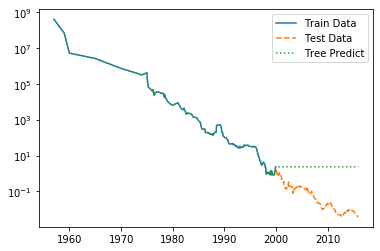

In [26]:
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, ls='--', label="Test Data")
plt.semilogy(ram_price.date, price_tree, ls=':', label="Tree Predict")
plt.legend()